In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')

In [3]:
# Create a data frame only with the columns that have numeric values and categorical
numerical = df.select_dtypes(include='number')

categorical = df.select_dtypes(exclude='number')

 <b> Lab Tuesday 11.04.2023 Spliting numerical values and traingn the model 
Lab Monday_10.04.2023 - Transforming categorical values (nominals and ordinals) into dummies. 



 2. One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).

In [4]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, minmax_scale

In [5]:
from sklearn.preprocessing import OneHotEncoder 

In [6]:
categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [7]:
# 3 Changing categorical nominals to dommies and getting rid of extra columns at the end with dorp first
import pandas as pd
nominals = pd.get_dummies(categorical, columns=['region','response','employment_status','gender','location_code','marital_status','marital_status','policy_type','sales_channel','policy','renew_offer_type','vehicle_class'], drop_first = True)

In [8]:
nominals 

,coverage,education,effective_to_date,month,vehicle_size,region_east,region_north west,region_west region,response_yes,employment_status_employed,...,policy_special l2,policy_special l3,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,basic,college,2/18/11,feb,medsize,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,basic,college,1/18/11,jan,medsize,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,basic,bachelor,2/10/11,feb,medsize,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,extended,college,1/11/11,jan,medsize,0,1,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,premium,bachelor,1/17/11,jan,medsize,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,premium,bachelor,1/19/11,jan,medsize,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
10685,basic,college,1/6/11,jan,medsize,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
10686,extended,bachelor,2/6/11,feb,medsize,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
10687,premium,college,2/13/11,feb,medsize,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [26]:
# 4 droping the colum 'effective_to_date' beacasue it is not possible to change to dumies 
nominals=nominals.drop(columns=['effective_to_date'])

In [15]:
# 5 Creating a function to replace categorical (ordinal) values 

def replacer(col_name,old_vals,new_vals):
    for i in range(len(old_vals)):
        categorical.loc[categorical[col_name] == old_vals[i], col_name] = new_vals[i]
    
    return categorical[col_name]

In [16]:
unique_coverage = categorical['coverage'].unique()
unique_coverage

array(['basic', 'extended', 'premium'], dtype=object)

In [17]:
categorical.month.unique()

array(['feb', 'jan'], dtype=object)

In [18]:
categorical.vehicle_size.unique()

array(['medsize', 'small', 'large'], dtype=object)

In [19]:
categorical.education.unique()

array(['college', 'bachelor', 'high school or below', 'doctor', 'master'],
      dtype=object)

In [21]:
nominals['coverage']=replacer('coverage',list(categorical.coverage.unique()), [0,1,2] )

In [22]:
nominals['education'] = replacer('education', list(categorical.education.unique()), [1,2,0,4,3])

In [23]:
nominals['month'] = replacer('month', list(categorical.month.unique()), [1,0])

In [24]:
nominals['vehicle_size'] = replacer('vehicle_size', list(categorical.vehicle_size.unique()), [1,0,2])

In [40]:
nominals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   coverage                         10689 non-null  object
 1   education                        10689 non-null  object
 2   month                            10689 non-null  object
 3   vehicle_size                     10689 non-null  object
 4   region_east                      10689 non-null  uint8 
 5   region_north west                10689 non-null  uint8 
 6   region_west region               10689 non-null  uint8 
 7   response_yes                     10689 non-null  uint8 
 8   employment_status_employed       10689 non-null  uint8 
 9   employment_status_medical leave  10689 non-null  uint8 
 10  employment_status_retired        10689 non-null  uint8 
 11  employment_status_unemployed     10689 non-null  uint8 
 12  gender_m                        

<b> Lab Tuesday 11.04.2023 Spliting numerical values and traingn the model 


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

In [29]:
RAND_STATE = 34 # for reproducible shuffling
TT_RATIO = 0.3 # test/train

In [30]:
from scipy.stats import iqr
def remove_outliers(df):
    for c in df.columns:
            pct_75 = np.percentile(df[c], 75)
            pct_25 = np.percentile(df[c], 25)
            upper_bound = pct_75 + 1.5*iqr(df[c])
            lower_bound = pct_25 - 1.5*iqr(df[c])
            condition = (df[c] < upper_bound) & (df[c] > lower_bound)
            df[c] = df[c][condition]  # Filter out the outliers
    return df

In [31]:
#removing highly correlated columns

CORR_THRESH = 0.80
corr_matrix=numerical.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
corrd_cols = [column for column in upper_triangle.columns if any(upper_triangle[column] > CORR_THRESH)]
numerical.drop(corrd_cols,axis=1,inplace=True)
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [32]:
#X,y, one-hot, and test/train

X = numerical.drop('total_claim_amount', axis=1)
y = numerical.total_claim_amount

In [38]:
X = pd.concat([(X[nominals.columns]),(X[numerical.columns])],axis=1)

KeyError: "None of [Index(['coverage', 'education', 'month', 'vehicle_size', 'region_east',\n       'region_north west', 'region_west region', 'response_yes',\n       'employment_status_employed', 'employment_status_medical leave',\n       'employment_status_retired', 'employment_status_unemployed', 'gender_m',\n       'location_code_suburban', 'location_code_urban',\n       'marital_status_married', 'marital_status_single',\n       'marital_status_married', 'marital_status_single',\n       'policy_type_personal auto', 'policy_type_special auto',\n       'sales_channel_branch', 'sales_channel_call center',\n       'sales_channel_web', 'policy_corporate l2', 'policy_corporate l3',\n       'policy_personal l1', 'policy_personal l2', 'policy_personal l3',\n       'policy_special l1', 'policy_special l2', 'policy_special l3',\n       'renew_offer_type_offer2', 'renew_offer_type_offer3',\n       'renew_offer_type_offer4', 'vehicle_class_luxury car',\n       'vehicle_class_luxury suv', 'vehicle_class_sports car',\n       'vehicle_class_suv', 'vehicle_class_two-door car'],\n      dtype='object')] are in the [columns]"

In [99]:
X.isna().any()

customer_lifetime_value          False
income                           False
monthly_premium_auto             False
months_since_last_claim          False
months_since_policy_inception    False
number_of_open_complaints        False
number_of_policies               False
dtype: bool

In [100]:
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [101]:
na_idcs = X[X.isna().any(axis=1)].index
X = pd.DataFrame(X).drop(na_idcs)
y = pd.DataFrame(y).drop(na_idcs)

In [102]:
# test-train split
#tt_ratio id defined above 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_RATIO, random_state=500)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
4204,9404,51593,80,5,91,2,2
7408,7379,61584,61,18,93,0,2
10084,4583,22728,116,28,81,0,1


<b> continuous transformations

In [103]:
# Make the distribution more normalized
pt = PowerTransformer()


In [104]:
# Transform the x_train 
# transform data from many columns
ct = ColumnTransformer([("pt", pt, list(X.columns))],
                        remainder='drop',verbose_feature_names_out=True,verbose=True).fit(X_train)
X_train_ct = pd.DataFrame(ct.transform(X_train),columns=ct.get_feature_names_out())

#just transform on x test
X_test_ct = pd.DataFrame(ct.transform(X_test),columns=ct.get_feature_names_out())

[ColumnTransformer] ............ (1 of 1) Processing pt, total=   0.1s


<b> Apply the model 

In [105]:
#model fit calculate the parameters

model=LinearRegression()    # model
model.fit(X_train_ct, y_train)   # model train

LinearRegression()

In [106]:
model.coef_

array([[ -0.28080659, -34.21983207, 159.22649031,   0.56546435,
         -0.17179903,  -6.39698482,   1.08097341]])

<b> Stats model and OLS 

In [107]:
model.intercept_

array([434.56188185])

In [108]:
y_pred = pd.DataFrame(model.predict(X_test_ct),columns = ['total_claim_amount'] )      # model prediction
y_pred_train =  pd.DataFrame(model.predict(X_train_ct),columns = ['total_claim_amount'])

Model Evaluation:
MSE.
RMSE.
MAE.
R2.
Adjusted R2.

In [109]:
import math

print('MSE:', mse(y_test,y_pred))
print('MAE:', mae(y_test,y_pred))
##prediction on the train set
print('MSE:',mse(y_train,y_pred_train))

mse = mse(y_train,y_pred_train)
print('RMSE:',math.sqrt(mse))


MSE: 59222.58954588035
MAE: 167.66702692287004
MSE: 58904.039805681365
RMSE: 242.7015447121863


In [110]:
R2=r2_score(y_test,y_pred)
R2

0.3095783067242128

In [111]:
R2_test=model.score(X_test_ct,y_test)
R2_train=model.score(X_train_ct,y_train)
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

Adj_R2

0.3080675371546816

In [112]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance':abs (model.coef_.reshape(len(X_train.columns),))
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
2,monthly_premium_auto,159.226490
1,income,34.219832
5,number_of_open_complaints,6.396985
6,number_of_policies,1.080973
3,months_since_last_claim,0.565464
0,customer_lifetime_value,0.280807
4,months_since_policy_inception,0.171799


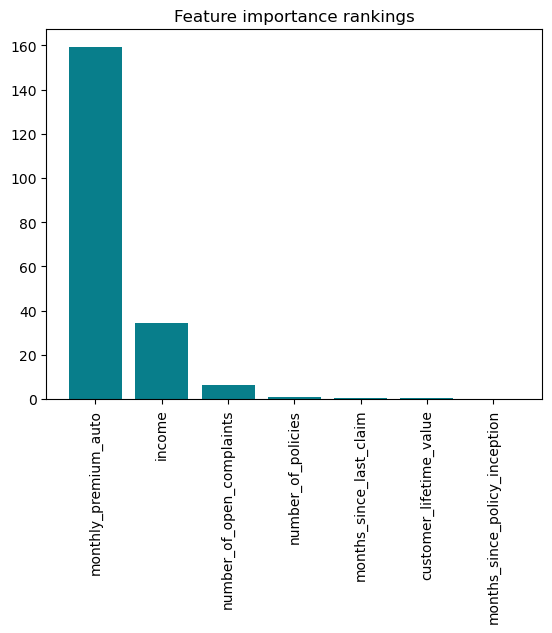

In [113]:
plt.bar(x=features_importances['Attribute'].iloc[:10], height=features_importances['Importance'].iloc[:10], color='#087E8B')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation='vertical')
plt.show()

In [114]:
nominals

,coverage,education,effective_to_date,month,vehicle_size,region_east,region_north west,region_west region,response_yes,employment_status_employed,...,policy_special l2,policy_special l3,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,basic,college,2/18/11,feb,medsize,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,basic,college,1/18/11,jan,medsize,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,basic,bachelor,2/10/11,feb,medsize,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,extended,college,1/11/11,jan,medsize,0,1,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,premium,bachelor,1/17/11,jan,medsize,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,premium,bachelor,1/19/11,jan,medsize,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
10685,basic,college,1/6/11,jan,medsize,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
10686,extended,bachelor,2/6/11,feb,medsize,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
10687,premium,college,2/13/11,feb,medsize,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [115]:
nominals = nominals.drop('education', axis=1)
nominals = nominals.drop('effective_to_date', axis=1)
nominals = nominals.drop('month', axis=1)
nominals = nominals.drop('vehicle_size', axis=1)
nominals = nominals.drop('coverage', axis=1)
nominals 

,region_east,region_north west,region_west region,response_yes,employment_status_employed,employment_status_medical leave,employment_status_retired,employment_status_unemployed,gender_m,location_code_suburban,...,policy_special l2,policy_special l3,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,0,0,0,0,1,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,1,1,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
10685,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10687,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [116]:
categoricals1=pd.concat([ordinals, nominals], axis=1)
categoricals1.reset_index()

,index,coverage,education,month,vehicle_size,region_east,region_north west,region_west region,response_yes,employment_status_employed,...,policy_special l2,policy_special l3,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,0,0,1,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,1,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,0,2,1,1,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,3,1,1,0,1,0,1,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,4,2,2,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,2,2,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
10685,10685,0,1,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
10686,10686,1,2,1,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
10687,10687,2,1,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [117]:
categoricals1

,coverage,education,month,vehicle_size,region_east,region_north west,region_west region,response_yes,employment_status_employed,employment_status_medical leave,...,policy_special l2,policy_special l3,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,2,1,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,1,1,0,1,0,1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2,2,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,2,2,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
10685,0,1,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
10686,1,2,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
10687,2,1,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [58]:
from scipy.stats import iqr
def remove_outliers(df):
    for c in df.columns:
            pct_75 = np.percentile(df[c], 75)
            pct_25 = np.percentile(df[c], 25)
            upper_bound = pct_75 + 1.5*iqr(df[c])
            lower_bound = pct_25 - 1.5*iqr(df[c])
            condition = (df[c] < upper_bound) & (df[c] > lower_bound)
            df[c] = df[c][condition]  # Filter out the outliers
    return df

In [120]:
remove_outliers(numerical)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.0,48029,61.0,7,52,NaN,NaN,292.0
1,2228.0,92260,64.0,3,26,NaN,1.0,744.0
2,14947.0,22139,100.0,34,31,NaN,2.0,480.0
3,NaN,49078,97.0,10,3,NaN,2.0,484.0
4,9025.0,23675,117.0,33,31,NaN,7.0,707.0
...,...,...,...,...,...,...,...,...
10684,15563.0,61541,NaN,12,40,NaN,7.0,NaN
10685,5259.0,61146,65.0,7,68,NaN,6.0,273.0
10686,NaN,39837,NaN,11,63,NaN,2.0,381.0
10687,11971.0,64195,158.0,0,27,NaN,6.0,618.0


In [121]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9728 non-null   float64
 1   income                         10689 non-null  int64  
 2   monthly_premium_auto           10182 non-null  float64
 3   months_since_last_claim        10689 non-null  int64  
 4   months_since_policy_inception  10689 non-null  int64  
 5   number_of_open_complaints      0 non-null      float64
 6   number_of_policies             10196 non-null  float64
 7   total_claim_amount             10148 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 668.2 KB
